In [1]:
from imports import *
from utils import *
import albumentations as A

<h1> Applying Albumentations to Videos

In this notebook, we adapt the popular image augmentation library `albumentations` to be applied to videos. <br>

1. Ensure that the transformations applied are consistent for each frame in the video
2. Account for shape changes from `torchvision`'s transforms (It's more efficient to apply these augmentations after them because of the smaller image size)

In [2]:
video   = read_video_tensor('../data/tennis.mp4')

In [29]:
def get_tfms(p=0.5, sub_p=0.3): return A.Compose([
        A.HorizontalFlip(),
        A.ShiftScaleRotate(rotate_limit=15, p=sub_p),
        A.ChannelDropout(p=sub_p),
        A.RandomRain(p=sub_p),
        A.GridDistortion(p=sub_p)
    ], p=p)

## Visualising the Augmentations

### Albumentations Only

> 1. Ensure that the transformations applied are consistent for each frame in the video

In [4]:
def aug_video(vid, tfms):
    seed = random.randint(0,99999)
    aug_vid = []
    for x in vid:
        random.seed(seed)
        aug_vid.append((tfms(image = np.asarray(x)))['image'])
    return torch.from_numpy(np.stack(aug_vid))

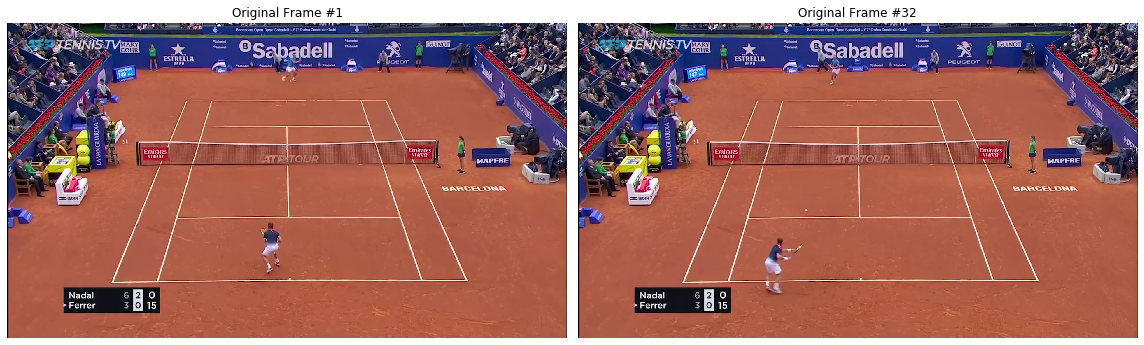

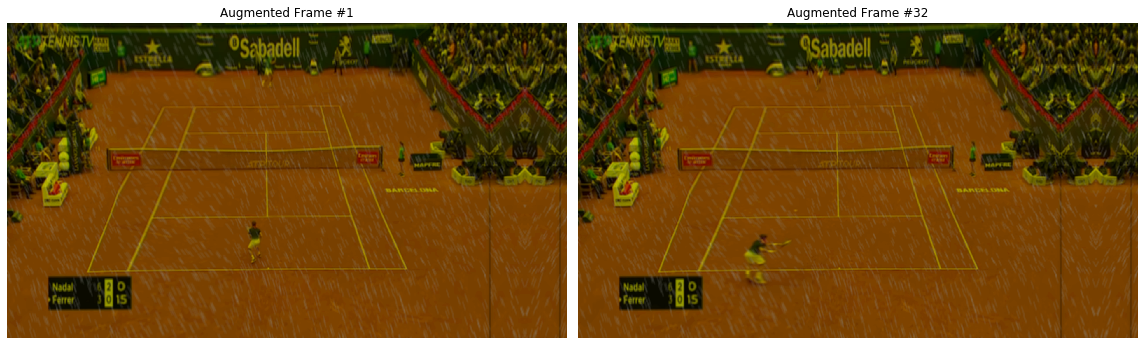

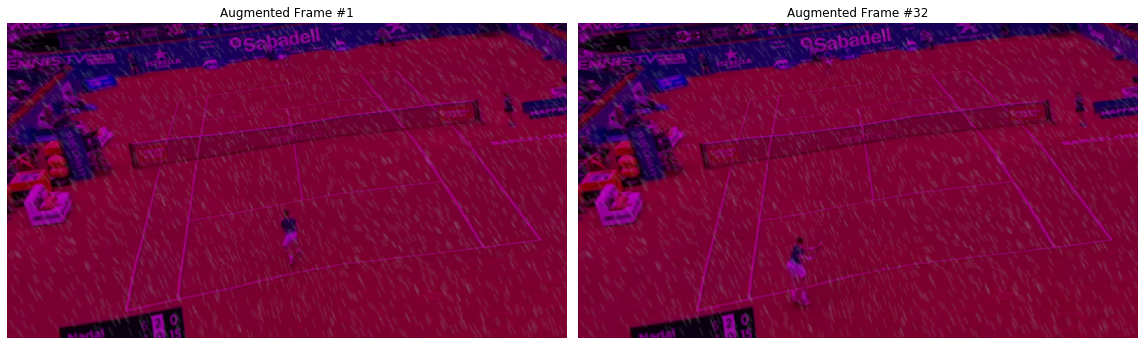

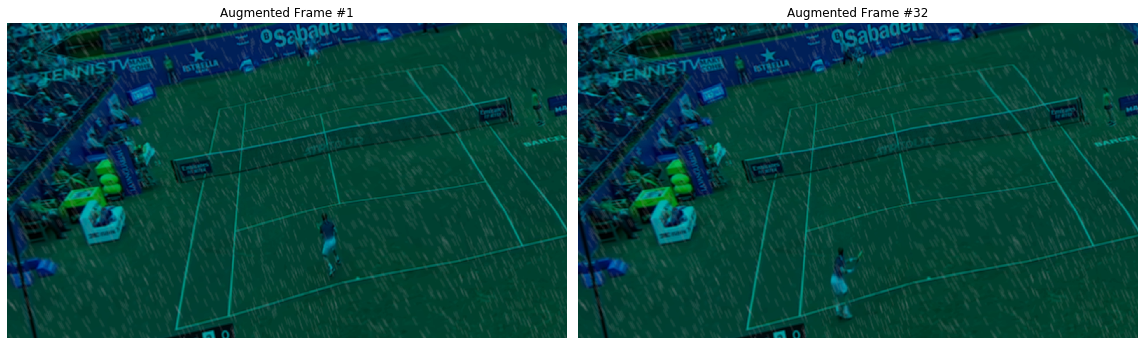

In [5]:
aug_vid = lambda x: aug_video(x, get_tfms(p=1, sub_p=1))

plot_adjacent(video,   prefix='Original ')
plot_adjacent(aug_vid(video), prefix='Augmented ')
plot_adjacent(aug_vid(video), prefix='Augmented ')
plot_adjacent(aug_vid(video), prefix='Augmented ')

### Albumentations + Transformations

<br>

When combining the transformations, we need to account for the changes in dimensions caused by the `torchvision` transforms, and that the output is also in the required shape i.e. `(C,T,H,W)`

We'll also see why it's a bad idea to apply heavy data augmentations

In [6]:
from tfms_torch import *

In [7]:
#export
import torch
import numpy as np
import random

def apply_tfms_albu(vid, tfms_albu):
    """
    Applies `tfms_albu` to `vid` (C,T,H,W) and returns
    a tensor of shape (C,T,H,W)
    """
    seed    = random.randint(0,99999)
    vid     = vid.permute(1,2,3,0) # added line of code
    aug_vid = []
    for x in vid:
        random.seed(seed)
        aug_vid.append((tfms_albu(image = np.asarray(x)))['image'])
    return torch.from_numpy(np.stack(aug_vid)).permute(3,0,1,2)

In [11]:
tfm_torch_vid = get_tfms_torch()(video)
tfm_torch_vid.shape

torch.Size([3, 42, 384, 681])

<h4> Why you need mild data augmentation </h4>
    
We redefine the `get_tfms_albu` function with more customised `sub_p`s

In [37]:
#export

import albumentations as A

def get_tfms_albu(p=0.6): return A.Compose([
        A.HorizontalFlip(),
        A.ShiftScaleRotate(rotate_limit=15),
        A.ChannelDropout(p=0.1),
        A.RandomRain(p=0.1),
        A.GridDistortion(p=0.2)
    ], p=p)

torch.Size([3, 42, 384, 681])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


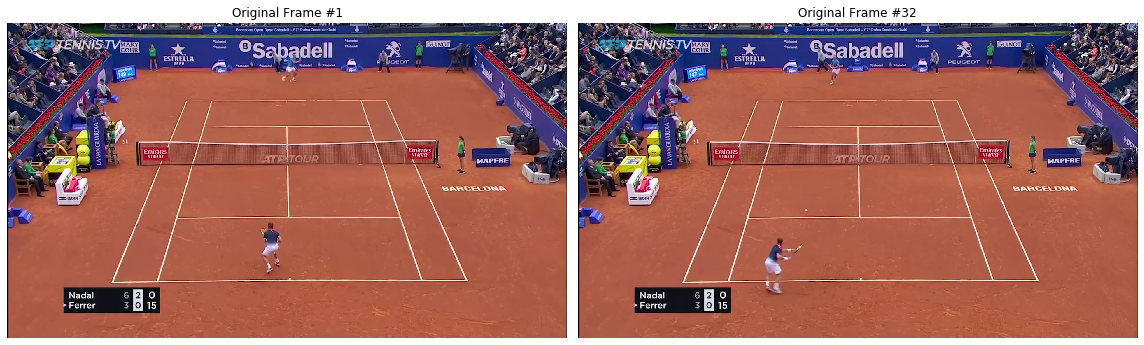

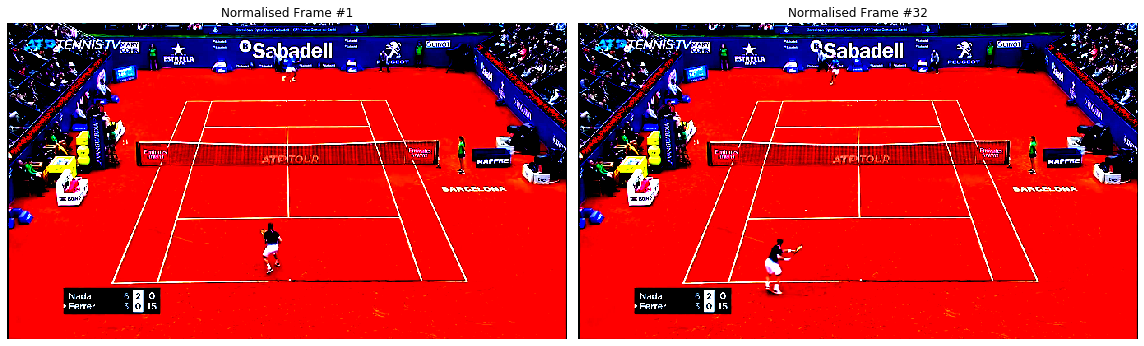

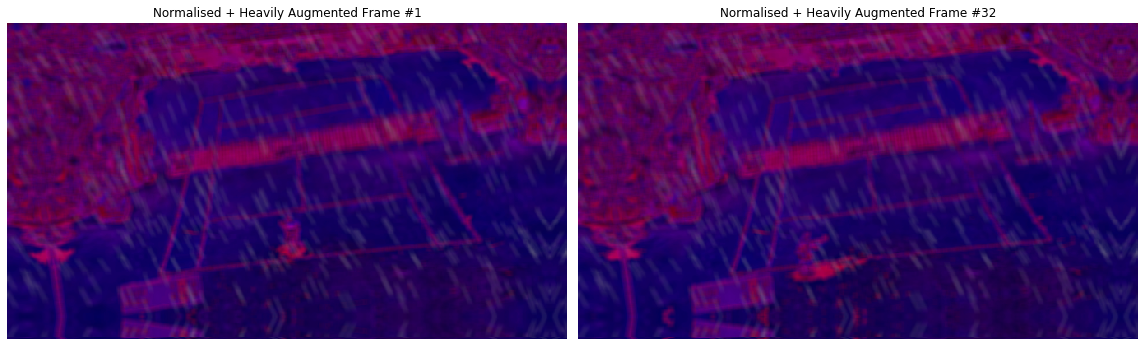

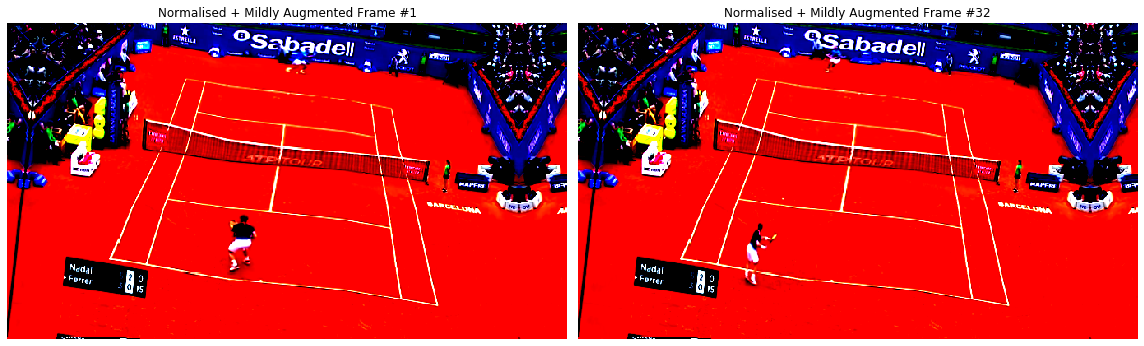

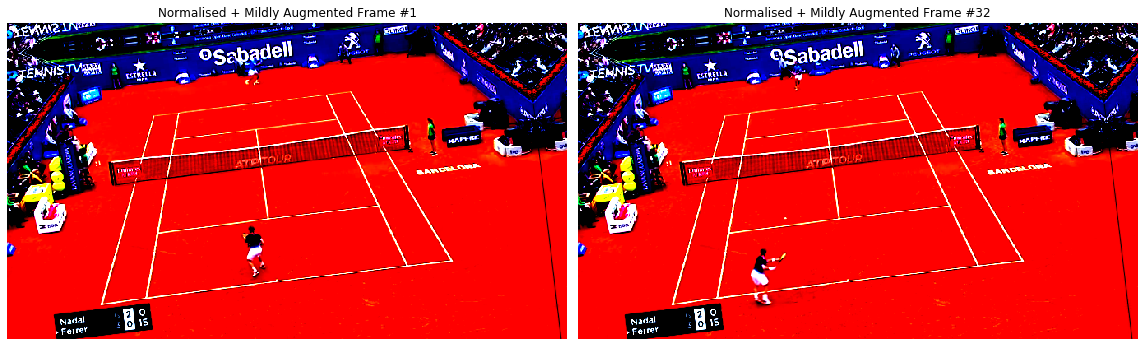

In [38]:
tfm_heavy = lambda x: apply_tfms_albu(x, get_tfms(p=1, sub_p=1))
tfm_mild  = lambda x: apply_tfms_albu(x, get_tfms_albu(p=1))
reshape   = lambda x: x.permute(1,2,3,0)

tfm_heavy(tfm_torch_vid).shape

plot_adjacent(video, prefix='Original ')
plot_adjacent(reshape(tfm_torch_vid), prefix='Normalised ')
plot_adjacent(reshape(tfm_heavy(tfm_torch_vid)), prefix='Normalised + Heavily Augmented ')
plot_adjacent(reshape(tfm_mild(tfm_torch_vid)), prefix='Normalised + Mildly Augmented ')
plot_adjacent(reshape(tfm_mild(tfm_torch_vid)), prefix='Normalised + Mildly Augmented ')

In [ ]:
!python notebook2script.py 02_tfms_albumentations.ipynb